In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

# Intro - Loading and checking completeness

For now this notebook will be brief in description, but we'll clean it up for submission.

Import the merged dataset:

1 Row per MSA per Year. Columns are merged from the FBI Crime (normalized to population upstream) and ACS demographic databases.

In [2]:
all_df = pd.read_csv('data/derived/crime_ACS_merged.csv', low_memory=False)
print(all_df.shape)
all_df.columns  # [:20]

(350, 567)


Index([u'Unnamed: 0', u'Aggravated assault', u'Burglary',
       u'Counties/principal cities', u'Forcible rape', u'Larceny- theft',
       u'Larceny-theft', u'Larceny‑ theft', u'Motor vehicle theft',
       u'Murder and nonnegligent manslaughter',
       ...
       u'Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1939 or earlier',
       u'Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1940 to 1949',
       u'Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1950 to 1959',
       u'Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1960 to 1969',
       u'Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1970 to 1979',
       u'Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1980 to 1989',
       u'Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1990 to 1999',
       u'Percent; YEAR STRUCTURE BUILT - Total housing units - Built 2000 to 2009',
       u'Percent; YEAR STRUCTURE BUILT - Total housing units - Bui

In [3]:
all_df.head(3)

,Unnamed: 0,Aggravated assault,Burglary,Counties/principal cities,Forcible rape,Larceny- theft,Larceny-theft,Larceny‑ theft,Motor vehicle theft,Murder and nonnegligent manslaughter,...,Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1939 or earlier,Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1940 to 1949,Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1950 to 1959,Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1960 to 1969,Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1970 to 1979,Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1980 to 1989,Percent; YEAR STRUCTURE BUILT - Total housing units - Built 1990 to 1999,Percent; YEAR STRUCTURE BUILT - Total housing units - Built 2000 to 2009,Percent; YEAR STRUCTURE BUILT - Total housing units - Built 2010 to 2013,Percent; YEAR STRUCTURE BUILT - Total housing units - Built 2014 or later
0,6,121.0,563.3,"Rate per 100,000 inhabitants",NaN,1857.3,NaN,NaN,144.0,6.0,...,19.0,7.2,14.9,11.6,13.9,9.1,12.9,9.4,1.5,0.6
1,30,NaN,264.7,"Rate per 100,000 inhabitants",NaN,NaN,NaN,NaN,89.1,2.6,...,24.8,5.8,11.6,10.2,12.1,10.4,10.7,11.6,2.0,0.9
2,36,413.7,761.3,"Rate per 100,000 inhabitants",NaN,2781.3,NaN,NaN,390.2,5.3,...,5.7,6.5,17.4,18.2,14.4,11.6,7.9,12.7,4.7,1.0


How many regions and years do we have? What's the histograms of value counts of region? View of "are the MSAs relatively stable or do they jump around over time?"

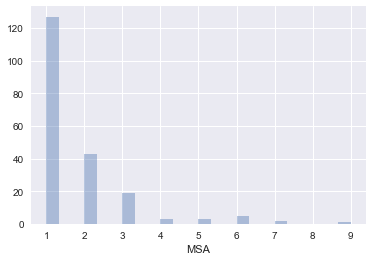

In [4]:
sns.distplot(all_df['MSA'].value_counts(), kde=False);

Many of the MSAs didn't survive the merge across all the years (not even 1 is in all 10 years). We'll have to see where this drops off.

Cut another way, are there some years that are particularly problematic?

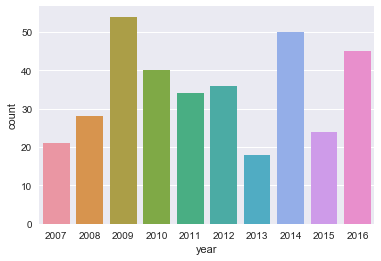

In [5]:
sns.countplot(x='year', data=all_df)

## Begining EDA - Basic Correlations

In general, do crimes tend to cluster together? I'd expect these relationships to be relatively high considering "safe" and "dangerous" neighborhoods.

In [6]:
np.random.seed(42)
df_train, df_test = train_test_split(all_df, test_size=.3, stratify=all_df['year'])
print(df_train.shape)

(245, 567)


In [7]:
crime_columns = ['Aggravated assault', 'Burglary', 'Counties/principal cities', 'Larceny',
                 'Motor vehicle theft', 'Murder and nonnegligent manslaughter', 'Property crime', 
                 'Rape', 'Robbery', 'Violent crime']
# fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.clustermap(df_train[crime_columns].corr().dropna(), annot=True, fmt='.02f', square=True);

KeyError: "['Larceny' 'Rape'] not in index"

### How does murder rate vary by MSA and time?

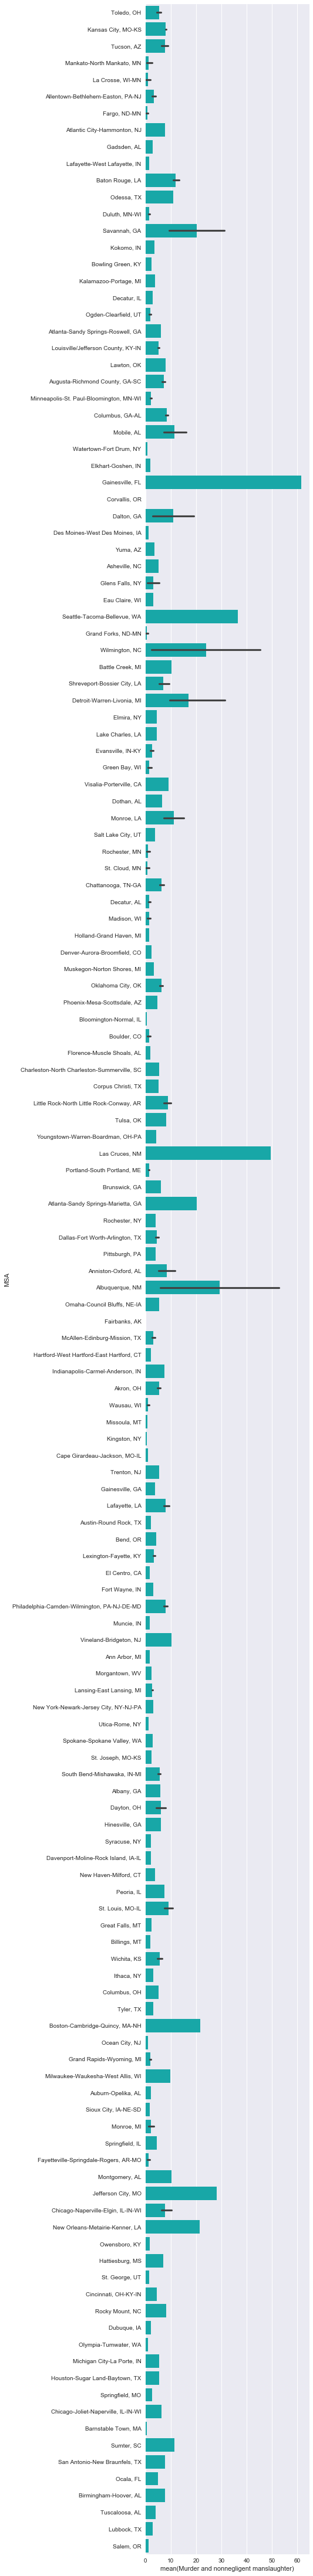

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 80))

sns.barplot(x=df_train['Murder and nonnegligent manslaughter'], y=df_train['MSA'], color = 'c')

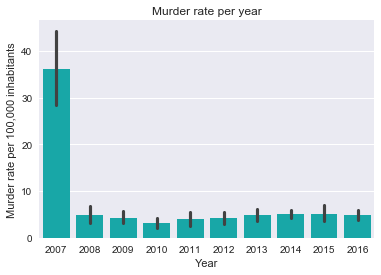

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

g = sns.barplot(x=df_train['year'] , y=df_train['Murder and nonnegligent manslaughter'], color = 'c')

ax.set_title('Murder rate per year')

ax.set_xlabel('Year')
ax.set_ylabel('Murder rate per 100,000 inhabitants')


Looking at rate of murders per year across all MSAs, we see that there was a steady rate around 5 murders per 100,000 inhabitants from 2008 to 2016. We noticed that 2007 presented an unusually high rate of murders; we believe this to be due to either changes in how murders were classified/reported from 2007 to 2008, or due to problems with our data cleaning. We will continue to look into this to get the 2007 estimates in shape.

### How do different demographic factors relate to murder rate?

#### Murder rate and age

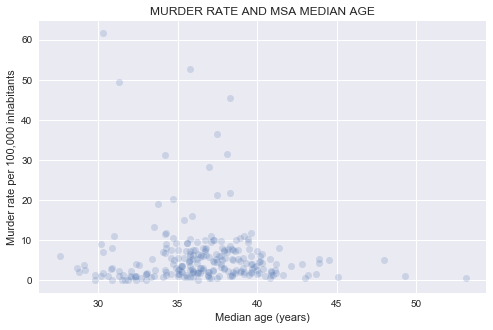

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(df_train['Estimate; SEX AND AGE - Median age (years)'], 
        df_train['Murder and nonnegligent manslaughter'], 'o', alpha=0.2)

ax.set_title('MURDER RATE AND MSA MEDIAN AGE')

ax.set_xlabel('Median age (years)')
ax.set_ylabel('Murder rate per 100,000 inhabitants')


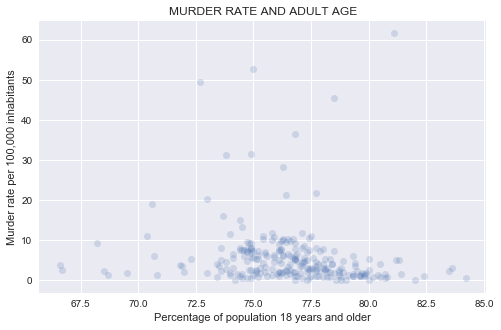

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(df_train['Percent; SEX AND AGE - 18 years and over'], 
        df_train['Murder and nonnegligent manslaughter'], 'o', alpha=0.2)

ax.set_title('MURDER RATE AND ADULT AGE')

ax.set_xlabel('Percentage of population 18 years and older')
ax.set_ylabel('Murder rate per 100,000 inhabitants')


Higher murder rates appear to be concentrated in MSAs were about 72-80% of the population are 18 years and older. MSAs with higher percentage of minors (smaller percentage of 18+ inhabitants) present lower murder rates.

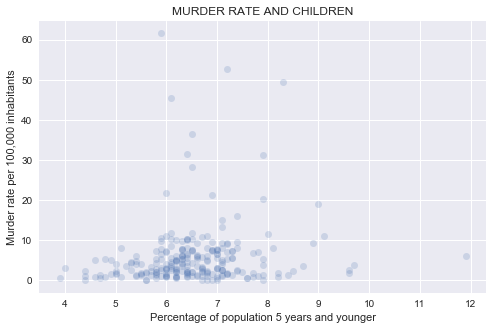

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(df_train['Percent; SEX AND AGE - Under 5 years'], 
        df_train['Murder and nonnegligent manslaughter'], 'o', alpha=0.2)

ax.set_title('MURDER RATE AND CHILDREN')

ax.set_xlabel('Percentage of population 5 years and younger')
ax.set_ylabel('Murder rate per 100,000 inhabitants')

#### Murder rate and gender

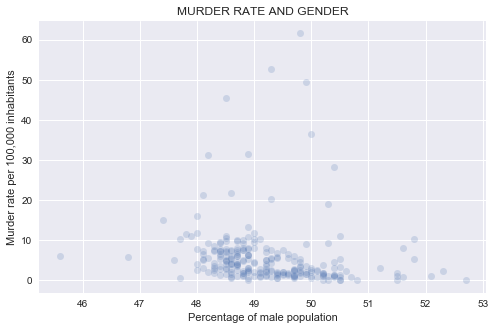

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(df_train['Percent; SEX AND AGE - Total population - Male'], 
        df_train['Murder and nonnegligent manslaughter'], 'o', alpha=0.2)

ax.set_title('MURDER RATE AND GENDER')

ax.set_xlabel('Percentage of male population')
ax.set_ylabel('Murder rate per 100,000 inhabitants')


The female:male ratio is pretty close to 1:1 for most MSAs, so the claims we can make regarding the relationship of murder rates and gender makeup are limited. The highest murder rates appear in the 48-52% male population MSAs.

#### Murder rate and income

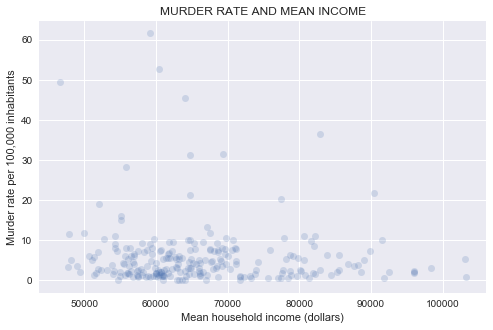

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(df_train['Estimate; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Total households - Mean household income (dollars)'], 
        df_train['Murder and nonnegligent manslaughter'], 'o', alpha=0.2)

ax.set_title('MURDER RATE AND MEAN INCOME')

ax.set_xlabel('Mean household income (dollars)')
ax.set_ylabel('Murder rate per 100,000 inhabitants')


The highest murder rates are associated to MSAs with lower mean income.

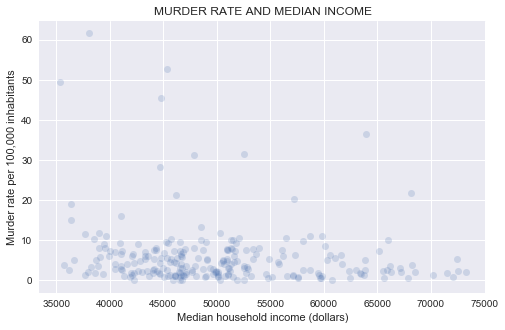

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(df_train['Estimate; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Total households - Median household income (dollars)'], 
        df_train['Murder and nonnegligent manslaughter'], 'o', alpha=0.2)

ax.set_title('MURDER RATE AND MEDIAN INCOME')

ax.set_xlabel('Median household income (dollars)')
ax.set_ylabel('Murder rate per 100,000 inhabitants')


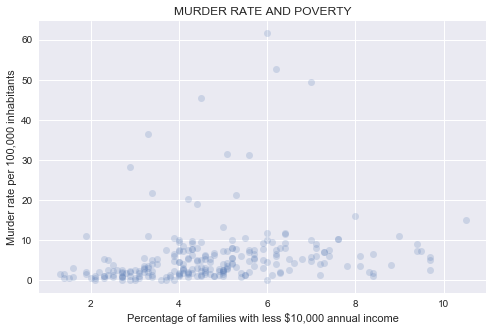

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(df_train['Percent; INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS) - Families - Less than $10,000'], 
        df_train['Murder and nonnegligent manslaughter'], 'o', alpha=0.2)

ax.set_title('MURDER RATE AND POVERTY')

ax.set_xlabel('Percentage of families with less $10,000 annual income')
ax.set_ylabel('Murder rate per 100,000 inhabitants')


#### Murder rate and educational attainment

/Users/constanzavidal/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


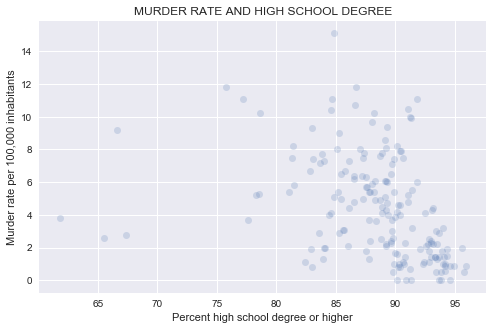

In [29]:
#Some missing values for Educational attainment column for years 2007-2009 (marked as '(X)'; 
    #replace with 'NaNs' so we can plot
df_train["Percent; EDUCATIONAL ATTAINMENT - Percent high school graduate or higher"] = df_train["Percent; EDUCATIONAL ATTAINMENT - Percent high school graduate or higher"].replace('(X)','NaN')

#murder and ed attainment plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(df_train["Percent; EDUCATIONAL ATTAINMENT - Percent high school graduate or higher"], 
        df_train['Murder and nonnegligent manslaughter'], 'o', alpha=0.2)

ax.set_title('MURDER RATE AND HIGH SCHOOL DEGREE')

ax.set_xlabel("Percent high school degree or higher")
ax.set_ylabel('Murder rate per 100,000 inhabitants')


/Users/constanzavidal/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


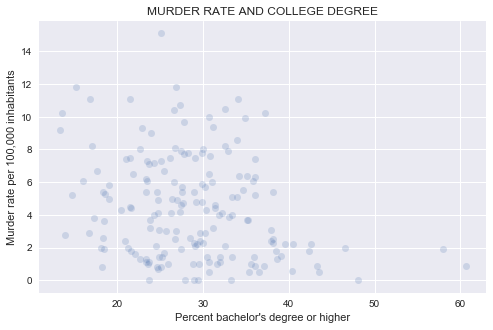

In [28]:
#Some missing values for Educational attainment column for years 2007-2009 (marked as '(X)'; 
    #replace with 'NaNs' so we can plot
df_train["Percent; EDUCATIONAL ATTAINMENT - Percent bachelor's degree or higher"] = df_train["Percent; EDUCATIONAL ATTAINMENT - Percent bachelor's degree or higher"].replace('(X)','NaN')

#murder and ed attainment plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(df_train["Percent; EDUCATIONAL ATTAINMENT - Percent bachelor's degree or higher"], 
        df_train['Murder and nonnegligent manslaughter'], 'o', alpha=0.2)

ax.set_title('MURDER RATE AND COLLEGE DEGREE')

ax.set_xlabel("Percent bachelor's degree or higher")
ax.set_ylabel('Murder rate per 100,000 inhabitants')


MSAs with lower percentage of inhabitants with a high school degree or higher present higher murder rates.

#### Murder rate and unemployment

/Users/constanzavidal/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


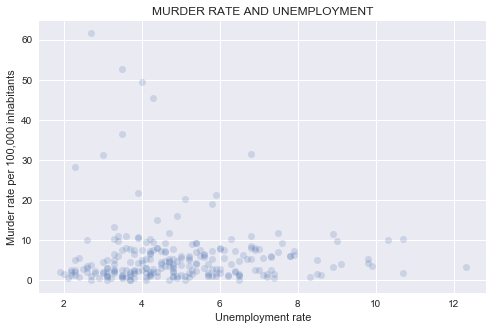

In [15]:
#Some missing values for Educational attainment column for years 2007-2009 (marked as '(X)'; 
    #replace with 'NaNs' so we can plot
df_train["Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Unemployed"] = df_train["Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Unemployed"].replace('N','NaN')

#murder and ed attainment plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(df_train["Percent; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Unemployed"], 
        df_train['Murder and nonnegligent manslaughter'], 'o', alpha=0.2)

ax.set_title('MURDER RATE AND UNEMPLOYMENT')

ax.set_xlabel("Unemployment rate")
ax.set_ylabel('Murder rate per 100,000 inhabitants')


Surpringly, the higher murder rates appear in MSAs with lower unemployment rates.